In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [115]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [116]:
df2 = df.copy()

Check for missing values

In [105]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Exploratory data analysis

In [106]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The min values for Glucose, BloodPressure, SkinThickness, Insulin and Bmi are all 0 which is not realistic. For example a bmi of 0 is not possible . The zeros may represent missing values. So I replace them with nan

In [14]:
df.shape

(768, 9)

In [117]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]= df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [108]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

The missing values are many and so replacing them is a better option, and plotting a histogram is necessary to know whether the missing values should be replaced with the mean or median.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

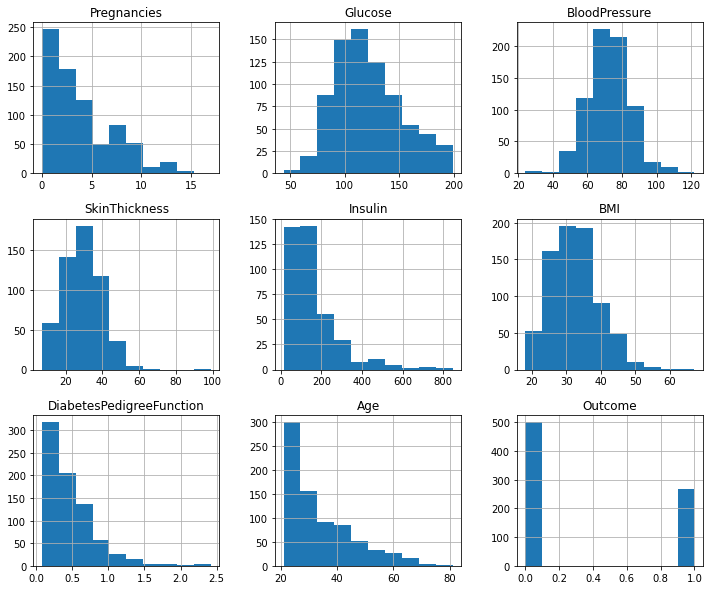

In [52]:
df.hist(figsize=(12,10))

In [118]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

In [119]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [120]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [121]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [68]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

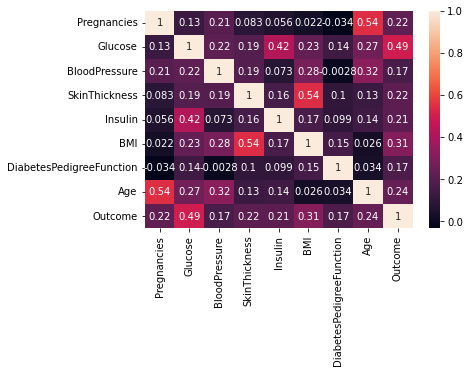

In [122]:
sns.heatmap(df.corr(), annot=True)

In [123]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [124]:
Y= df['Outcome']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [125]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=3 ) 

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


In [130]:
k=3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh

KNeighborsClassifier(n_neighbors=3)

In [131]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [132]:
ypred = neigh.predict(x_test)
ypred[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [133]:
yhat = neigh.predict(x_train)
yhat[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [134]:
from sklearn import metrics

In [135]:
print('The train Accuracy is:', metrics.accuracy_score(y_train, yhat))
print('The test Accuracy is:', metrics.accuracy_score(y_test, ypred))

The train Accuracy is: 0.851024208566108
The test Accuracy is: 0.7316017316017316


In [136]:
n= 16
test_score = np.zeros((n-1))
train_score = np.zeros((n-1))
for i in range(1, n):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    ypred = neigh.predict(x_test)
    yhat = neigh.predict(x_train)
    test_score[i-1] = metrics.accuracy_score(y_test, ypred)
    train_score[i-1] = metrics.accuracy_score(y_train, yhat)
print(test_score)
print('')
print(train_score)


[0.71861472 0.67965368 0.73160173 0.7012987  0.7012987  0.68831169
 0.71428571 0.68831169 0.6969697  0.6969697  0.6969697  0.68831169
 0.71428571 0.67965368 0.7012987 ]

[1.         0.81936685 0.85102421 0.81750466 0.83054004 0.82495345
 0.83054004 0.82681564 0.82867784 0.81191806 0.81378026 0.81005587
 0.80446927 0.79329609 0.80074488]


The best accuracy for testing is at k = 3 with an accuracy score of 0.73

In [137]:
conf_test= metrics.confusion_matrix(y_test, ypred)
conf_train = metrics.confusion_matrix(y_train, yhat)

In [138]:
conf_test

array([[117,  16],
       [ 53,  45]], dtype=int64)

In [139]:
conf_train

array([[335,  32],
       [ 75,  95]], dtype=int64)

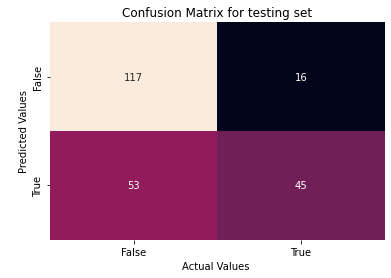

In [140]:
ax= sns.heatmap(conf_test, annot=True, cbar= False, fmt='g')
ax.set_title('Confusion Matrix for testing set')
ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

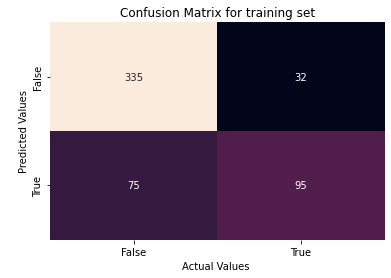

In [141]:
ax= sns.heatmap(conf_train, annot=True, cbar= False, fmt='g')
ax.set_title('Confusion Matrix for training set')
ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [73]:
!pip install disarray

In [142]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [143]:
print(precision_score(y_train, yhat))
print(recall_score(y_train, yhat))

0.7480314960629921
0.5588235294117647


In [144]:
print(precision_score(y_test, ypred))
print(recall_score(y_test, ypred))

0.7377049180327869
0.45918367346938777
